In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import root_mean_squared_error
from pmdarima.arima import auto_arima
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import SimpleExpSmoothing,ExponentialSmoothing

## AR model

In [2]:
milk = pd.read_csv('monthly-milk-production-pounds-p.csv',index_col=0)

In [3]:

y = milk['Milk']
y_train = y[:-12]
y_test = y[-12:]

In [4]:
model = ARIMA(y_train,order=(1,0,0),freq='MS')
model_fit = model.fit()
model_fit.params

C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


const      741.622665
ar.L1        0.900561
sigma2    1933.729258
dtype: float64

In [5]:
y_pred = model_fit.predict(start=len(y_train),end=len(y_train)+len(y_test)-1)

In [6]:
root_mean_squared_error(y_test,y_pred)

98.7546080336063

<function matplotlib.pyplot.show(close=None, block=None)>

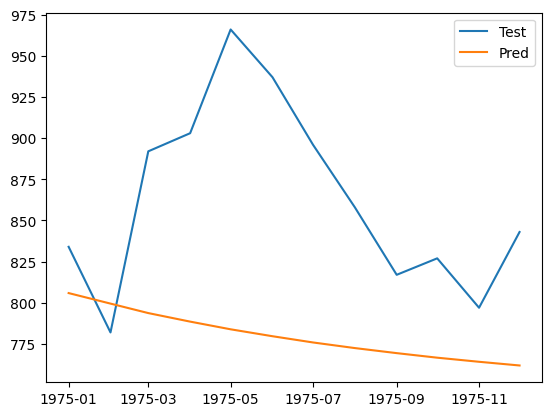

In [7]:
# y_test.plot(label="Test")
# y_pred.plot(label="Pred")
# plt.legend()
# plt.show

y_test.index = y_pred.index

plt.plot(y_test,label="Test")
plt.plot(y_pred,label="Pred")
plt.legend()
plt.show

In [8]:
diff_1 = y.diff()[1:]

In [9]:
y_train = diff_1[:156]
y_test = diff_1[156:]

In [10]:
y_train.shape

(156,)

In [11]:
y_test.shape

(11,)

In [12]:
model = ARIMA(y_train,order=(12,1,0),freq='MS')
model_fit = model.fit()
model_fit.params
y_pred = model_fit.predict(start=len(y_train),end=len(y_train)+len(y_test)-1)
root_mean_squared_error(y_test,y_pred)

C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda-install\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\anaconda-install\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6.47764592990069

<function matplotlib.pyplot.show(close=None, block=None)>

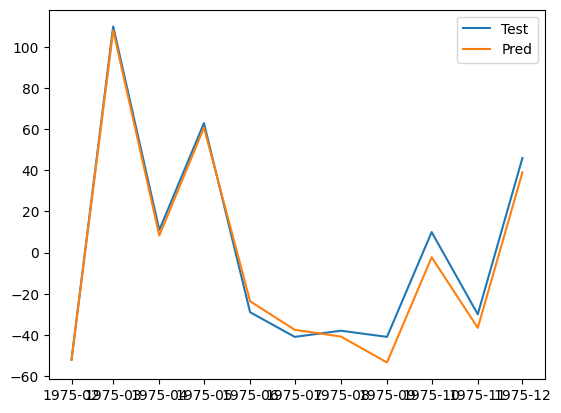

In [13]:
# y_test.plot(label="Test")
# y_pred.plot(label="Pred")
# plt.legend()
# plt.show
y_test.index = y_pred.index

plt.plot(y_test,label="Test")
plt.plot(y_pred,label="Pred")
plt.legend()
plt.show


### MA model

In [14]:
model = ARIMA(y_train,order=(0,0,1),freq='MS')
model_fit = model.fit()
model_fit.params
y_pred = model_fit.predict(start=len(y_train),end=len(y_train)+len(y_test)-1)
root_mean_squared_error(y_test,y_pred)

C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


50.187360119066746

### ARMA models

In [15]:
model = ARIMA(y_train,order=(1,0,1),freq='MS')
model_fit = model.fit()
model_fit.params
y_pred = model_fit.predict(start=len(y_train),end=len(y_train)+len(y_test)-1)
root_mean_squared_error(y_test,y_pred)

C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


50.2163915219831

### SARIMAX

In [16]:
model = ARIMA(y_train,order=(3,1,0),freq='MS', seasonal_order= (1,1,1,12))
model_fit = model.fit()
y_pred = model_fit.predict(start=len(y_train),end=len(y_train)+len(y_test)-1)
root_mean_squared_error(y_test,y_pred)

C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


6.827493133468838

In [17]:
model_fit.params

ar.L1       -0.981636
ar.L2       -0.654104
ar.L3       -0.200849
ar.S.L12    -0.053180
ma.S.L12    -0.566079
sigma2      68.627009
dtype: float64

In [18]:
model = ARIMA(y_train)
model_fit = model.fit()
model_fit.params
y_pred = model_fit.predict(start=len(y_train),end=len(y_train)+len(y_test)-1)
root_mean_squared_error(y_test,y_pred)

C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


50.141492717167665

In [19]:
!pip install pmdarima

In [20]:
model= auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings= True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1603.304, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1633.938, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1635.704, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1635.783, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1632.128, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1614.241, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1628.486, Time=0.22 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1583.899, Time=0.71 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=1604.771, Time=0.99 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=1606.920, Time=0.92 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1588.792, T

In [21]:
y_pred= model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test,y_pred)


49.35900301206405

<function matplotlib.pyplot.show(close=None, block=None)>

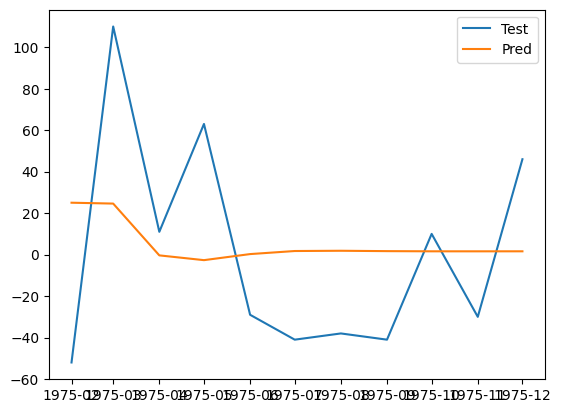

In [22]:
y_test.index = y_pred.index

plt.plot(y_test,label="Test")
plt.plot(y_pred,label="Pred")
plt.legend()
plt.show

## SARIMA(auto)

In [23]:
model= auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings= True, seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1001.971, Time=1.45 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1047.329, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1011.031, Time=0.42 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=996.210, Time=0.33 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1045.332, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1039.383, Time=0.10 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=998.024, Time=0.47 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=997.960, Time=1.18 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1011.191, Time=0.31 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=3.23 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1004.020, Time=0.24 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=998.094, Time=0.44 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=998.011, Time=0.47 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=996.531, Time=0.35 sec
 ARIMA(1,0,2)(0,1,1)[12] inter

In [24]:
y_pred= model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test,y_pred)


5.501683218850664

<function matplotlib.pyplot.show(close=None, block=None)>

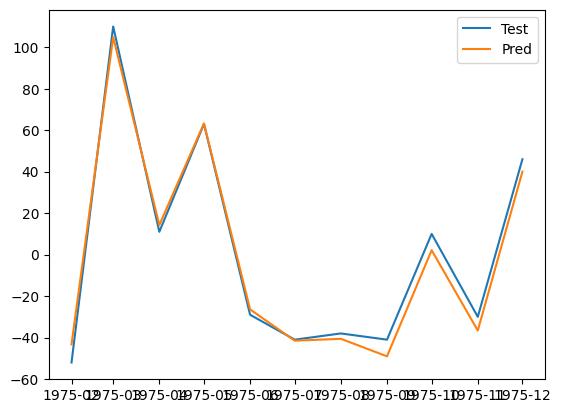

In [25]:
y_test.index = y_pred.index

plt.plot(y_test,label="Test")
plt.plot(y_pred,label="Pred")
plt.legend()
plt.show

In [26]:
model= auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings= True, seasonal=True, m=12, max_d=3)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1001.971, Time=1.40 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1047.329, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1011.031, Time=0.40 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=996.210, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1045.332, Time=0.04 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1039.383, Time=0.10 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=998.024, Time=0.45 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=997.960, Time=1.12 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1011.191, Time=0.31 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=3.26 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1004.020, Time=0.26 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=998.094, Time=0.43 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=998.011, Time=0.44 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=996.531, Time=0.35 sec
 ARIMA(1,0,2)(0,1,1)[12] inter

In [27]:
y_pred= model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test,y_pred)


5.501683218850664

<function matplotlib.pyplot.show(close=None, block=None)>

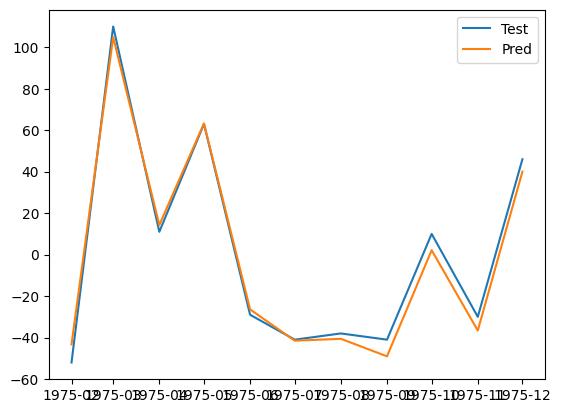

In [28]:
y_test.index = y_pred.index

plt.plot(y_test,label="Test")
plt.plot(y_pred,label="Pred")
plt.legend()
plt.show

In [29]:
model= auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings= True, seasonal=True, m=12, max_d=3, stepwise=False)

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1047.329, Time=0.04 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1004.020, Time=0.25 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1005.879, Time=0.94 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1020.313, Time=0.32 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1005.921, Time=0.34 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=2.65 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1010.956, Time=0.94 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=1006.504, Time=1.29 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=3.06 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1039.383, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=996.210, Time=0.31 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=997.960, Time=1.10 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1011.191, Time=0.31 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=998.024, Time=0.46 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=3.20 sec
 ARIMA(0,0,1)

In [30]:
y_pred= model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test,y_pred)


6.033774790114988

## Bundesbank

In [31]:
bank= pd.read_csv("BUNDESBANK-BBK01_WT5511.csv", index_col=0)

In [32]:

y = bank['Value']
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((565,), (12,))

In [33]:
y_train

Date
30-04-1968      39.10
31-05-1968      42.00
30-06-1968      40.95
31-07-1968      38.90
31-08-1968      39.85
               ...   
31-12-2014    1199.25
31-01-2015    1263.50
28-02-2015    1205.00
31-03-2015    1179.25
30-04-2015    1204.30
Name: Value, Length: 565, dtype: float64

In [34]:
y_test

Date
31-05-2015    1190.40
30-06-2015    1175.00
31-07-2015    1080.05
31-08-2015    1125.50
30-09-2015    1122.50
31-10-2015    1147.75
30-11-2015    1055.65
31-12-2015    1062.25
31-01-2016    1112.90
29-02-2016    1234.15
31-03-2016    1233.60
30-04-2016    1237.70
Name: Value, dtype: float64

In [35]:
model= auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings= True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5622.164, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5618.047, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5617.332, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5622.101, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5618.606, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5618.188, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5617.812, Time=0.11 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.745 seconds


In [36]:
y_pred= model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test,y_pred)


91.10508106510662

<function matplotlib.pyplot.show(close=None, block=None)>

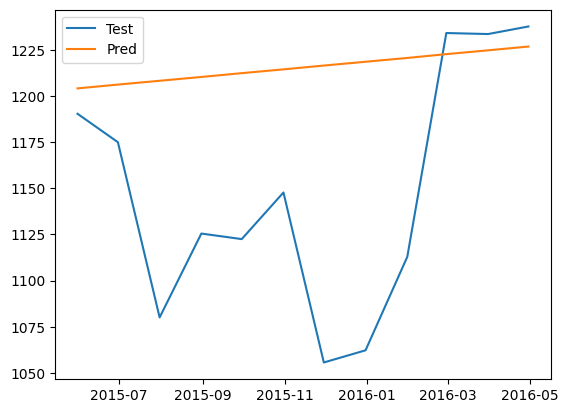

In [37]:
y_test.index = y_pred.index

plt.plot(y_test,label="Test")
plt.plot(y_pred,label="Pred")
plt.legend()
plt.show


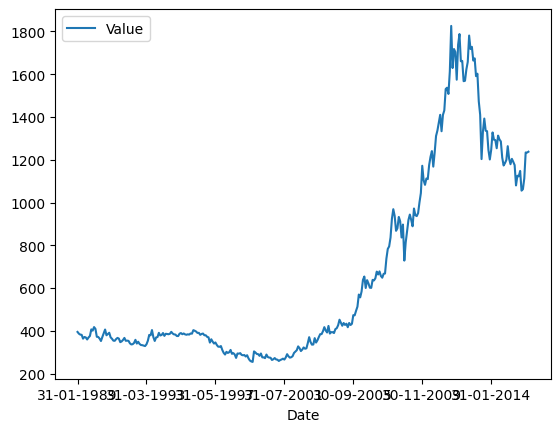

In [38]:
y_short= y[-328:]
y_short.plot()
plt.legend()


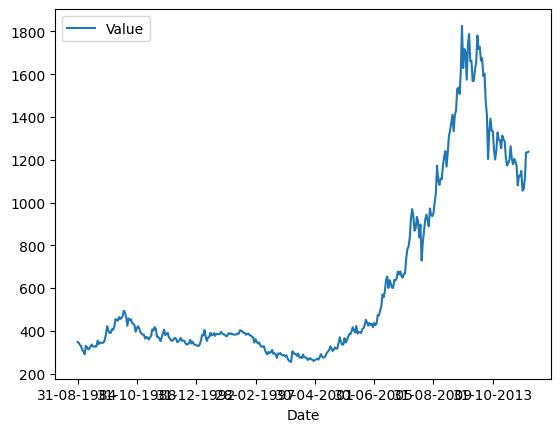

In [39]:
y_short= y[196:]
y_short.plot()
plt.legend()

In [40]:
model= auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings= True, seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5615.321, Time=3.04 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5622.164, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5619.560, Time=0.49 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5618.957, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5622.101, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=5613.419, Time=2.62 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=5611.792, Time=5.33 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=5617.378, Time=5.90 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=3.04 sec
 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=5622.630, Time=3.09 sec
 ARIMA(3,1,2)(0,0,2)[12] intercept   : AIC=5626.629, Time=3.83 sec
 ARIMA(2,1,3)(0,0,2)[12] intercept   : AIC=5626.630, Time=4.65 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=5621.194, Time=2.15 sec
 ARIMA(1,1,3)(0,0,2)[12] inte

In [41]:
y_pred= model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test,y_pred)


106.01078934580089

<function matplotlib.pyplot.show(close=None, block=None)>

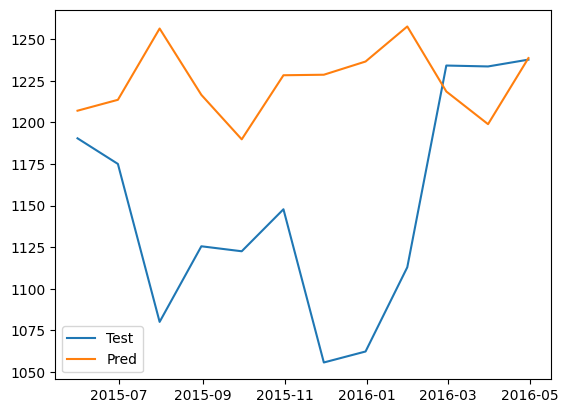

In [42]:
y_test.index = y_pred.index

plt.plot(y_test,label="Test")
plt.plot(y_pred,label="Pred")
plt.legend()
plt.show

## AUSGAS

In [43]:
gas= pd.read_csv("AusGas.csv", index_col=0)

In [44]:

y = gas['GasProd']
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((464,), (12,))

In [45]:
# Without Seasonal


In [46]:
model= auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings= True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8355.010, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8632.352, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8589.946, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8603.593, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8631.502, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.932, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8577.053, Time=0.18 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8327.013, Time=1.39 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8426.177, Time=1.05 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8270.659, Time=1.32 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8404.271, Time=1.04 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=8390.858, Time=1.85 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.48 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.31 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=8

In [47]:
y_pred= model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test,y_pred)


2580.7662520472354

<function matplotlib.pyplot.show(close=None, block=None)>

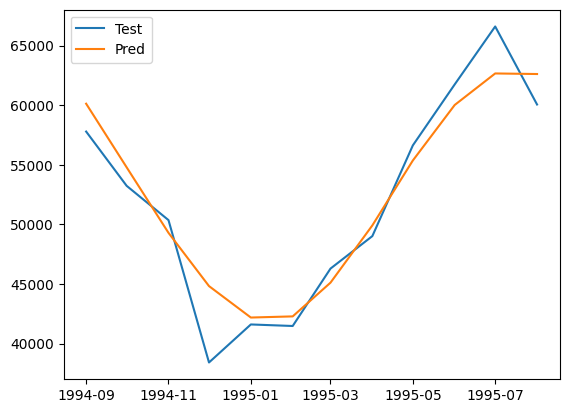

In [48]:
y_test.index = y_pred.index

plt.plot(y_test,label="Test")
plt.plot(y_pred,label="Pred")
plt.legend()
plt.show


In [49]:
#With Seasonal

In [50]:
model= auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings= True, seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.91 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8632.352, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8255.565, Time=1.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8438.509, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8631.502, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=8589.946, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=2.08 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=8170.932, Time=1.95 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=8438.053, Time=0.71 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=8218.659, Time=3.44 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=8208.277, Time=3.95 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=8371.138, Time=1.77 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=5.08 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=8219.426, Time=1.37 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

In [51]:
y_pred= model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test,y_pred)


3449.0026759037787

<function matplotlib.pyplot.show(close=None, block=None)>

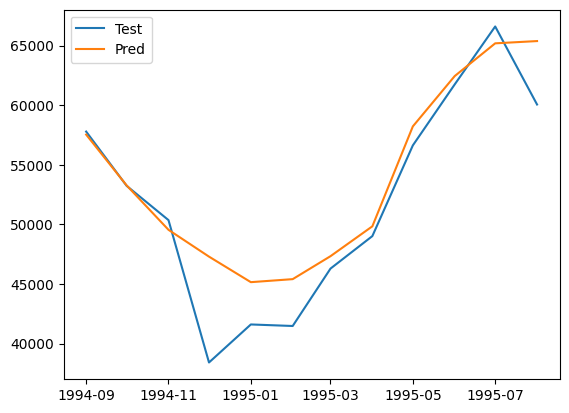

In [52]:
y_test.index = y_pred.index

plt.plot(y_test,label="Test")
plt.plot(y_pred,label="Pred")
plt.legend()
plt.show


In [53]:
#Arima

In [54]:
model = ARIMA(y_train,order=(1,0,0),freq='MS')
model_fit = model.fit()
model_fit.params

C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provide

const     2.062608e+04
ar.L1     9.928972e-01
sigma2    7.265616e+06
dtype: float64

In [55]:
y_pred = model_fit.predict(start=len(y_train),end=len(y_train)+len(y_test)-1)

In [56]:
root_mean_squared_error(y_test,y_pred)


13520.150327065478

In [57]:
diff_1 = y.diff()[1:]

In [58]:
y_train.shape

(464,)

In [59]:
y_train = diff_1[:144]
y_test = diff_1[144:]

In [60]:
model = ARIMA(y_train,order=(12,1,0),freq='MS')
model_fit = model.fit()
model_fit.params
y_pred = model_fit.predict(start=len(y_train),end=len(y_train)+len(y_test)-1)
root_mean_squared_error(y_test,y_pred)

C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provide

3213.1962727148266

<function matplotlib.pyplot.show(close=None, block=None)>

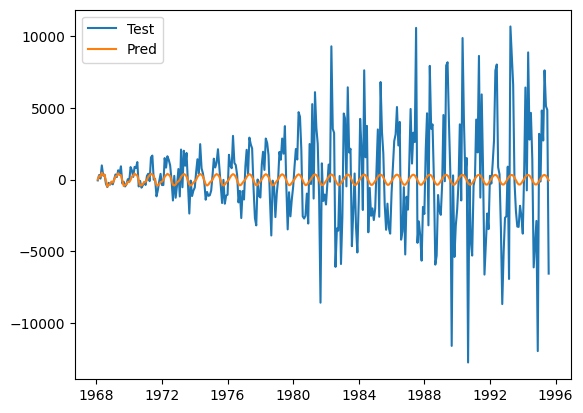

In [61]:
y_test.index = y_pred.index

plt.plot(y_test,label="Test")
plt.plot(y_pred,label="Pred")
plt.legend()
plt.show


C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


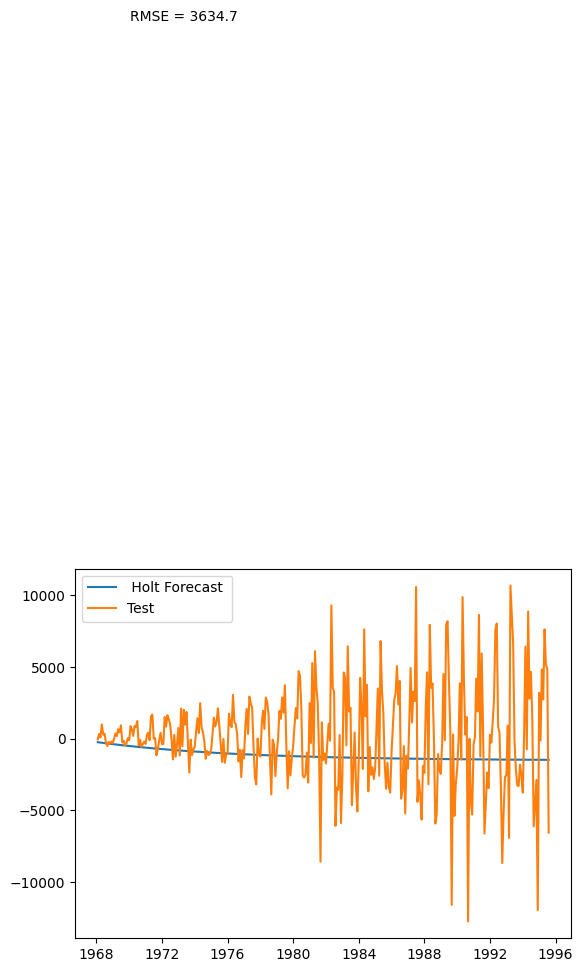

In [62]:
holt = Holt(y_train, damped_trend=True)
fit1= holt.fit()
# alpha,beta = 0.2,0.4
# fit1 = holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))

holt_fcast = pd.Series(fcast1,index=y_test.index)
error = round(root_mean_squared_error(y_test,holt_fcast),2)
holt_fcast.index= y_test.index

plt.text(8,50000,"RMSE = "+str(error))
plt.plot(holt_fcast,label=" Holt Forecast ")
plt.plot(y_test,label="Test")
plt.legend(loc='best')
plt.show()

In [63]:
hw_ml = ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='mul',damped_trend=True)
fit3 = hw_ml.fit()
fcast3=fit3.forecast(len(y_test))
hw_ml_fcast = pd.Series(fcast3,index=y_test.index)
error = round(root_mean_squared_error(y_test,hw_ml_fcast) ,2)
y_test.index= hw_ml_fcast.index
plt.text(8,50000,"RMSE"+str(error))
plt.plot(hw_ml_fcast,label='HW Damped Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()

C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\anaconda-install\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ValueError: endog must be strictly positive when usingmultiplicative trend or seasonal components.

In [ ]:
y_pred= model.predict(n_periods=len(y_test))
root_mean_squared_error(y_test,y_pred)

In [ ]:
y_pred.index= y_test.index
error = round(root_mean_squared_error(y_test,y_pred),2)

plt.text(8,50000,"RMSE = "+str(error))
plt.plot(holt_fcast,label=" SARIMA Forecast ")
plt.plot(y_test,label="Test")
plt.legend(loc='best')
plt.show()